# 220968280 - Anirudh Swaminathan - DSE A2

## Week 3 - Exercise 4 - Air quality dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [18]:
df = pd.DataFrame()
df = pd.read_excel("C://Users//s_ani//Documents//textbooks//4thSem//ML_LAB//Week3//datasets//AirQualityUCI.xlsx")
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

### 1. Linear regression on air quality dataset

In [20]:
X = train['NOx(GT)']
Y = train['NO2(GT)']

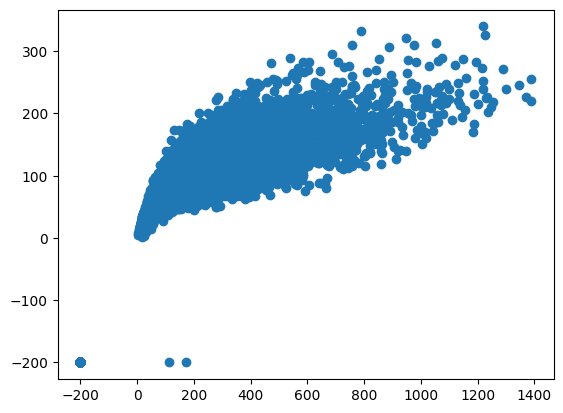

In [21]:
plt.scatter(X, Y)

In [22]:
X = np.array(X).reshape((-1,1))
Y = np.array(Y).reshape((-1,1))
reg = LinearRegression().fit(X, Y)

In [23]:
print(f'{reg.intercept_} + {reg.coef_} * x')

[-10.52111169] + [[0.40381316]] * x


In [24]:
x = np.linspace(-200, 1700, 100)
y = reg.intercept_ + reg.coef_*x
y = y.reshape(100,1)

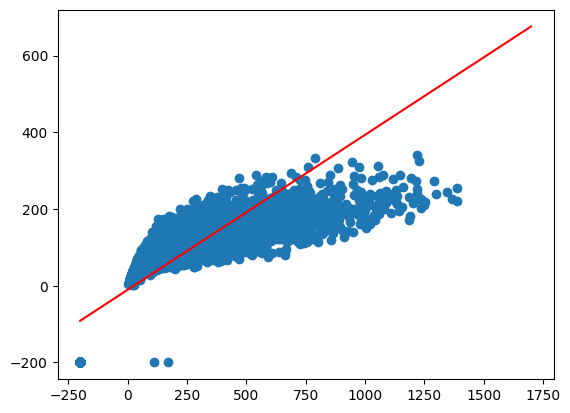

In [25]:
plt.scatter(X, Y)
plt.plot(x, y, c='red')

In [26]:
xi = int(input("Enter an NOx(GT): "))
y_pred = reg.predict([[xi]])
print(f'the predicted value is:{y_pred}')

the predicted value is:[[312.52941796]]


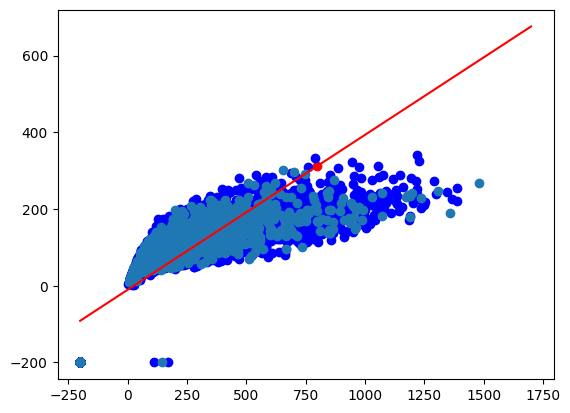

In [27]:
plt.scatter(xi,y_pred,c='red')
plt.plot(x, y, c='red')
plt.scatter(X, Y, c='blue')
plt.scatter(test['NOx(GT)'], test['NO2(GT)'])

In [28]:
predictions = reg.predict(np.array(test['NOx(GT)']).reshape((-1,1)))
mse = mean_squared_error(test['NO2(GT)'], predictions)
print(f'mse = {mse}')

mse = 5258.089684562831


### 2. Multiple linear regression on air quality dataset

In [29]:
X = train.drop('NO2(GT)', axis=1)
Y = train['NO2(GT)']
Y = pd.DataFrame(Y)

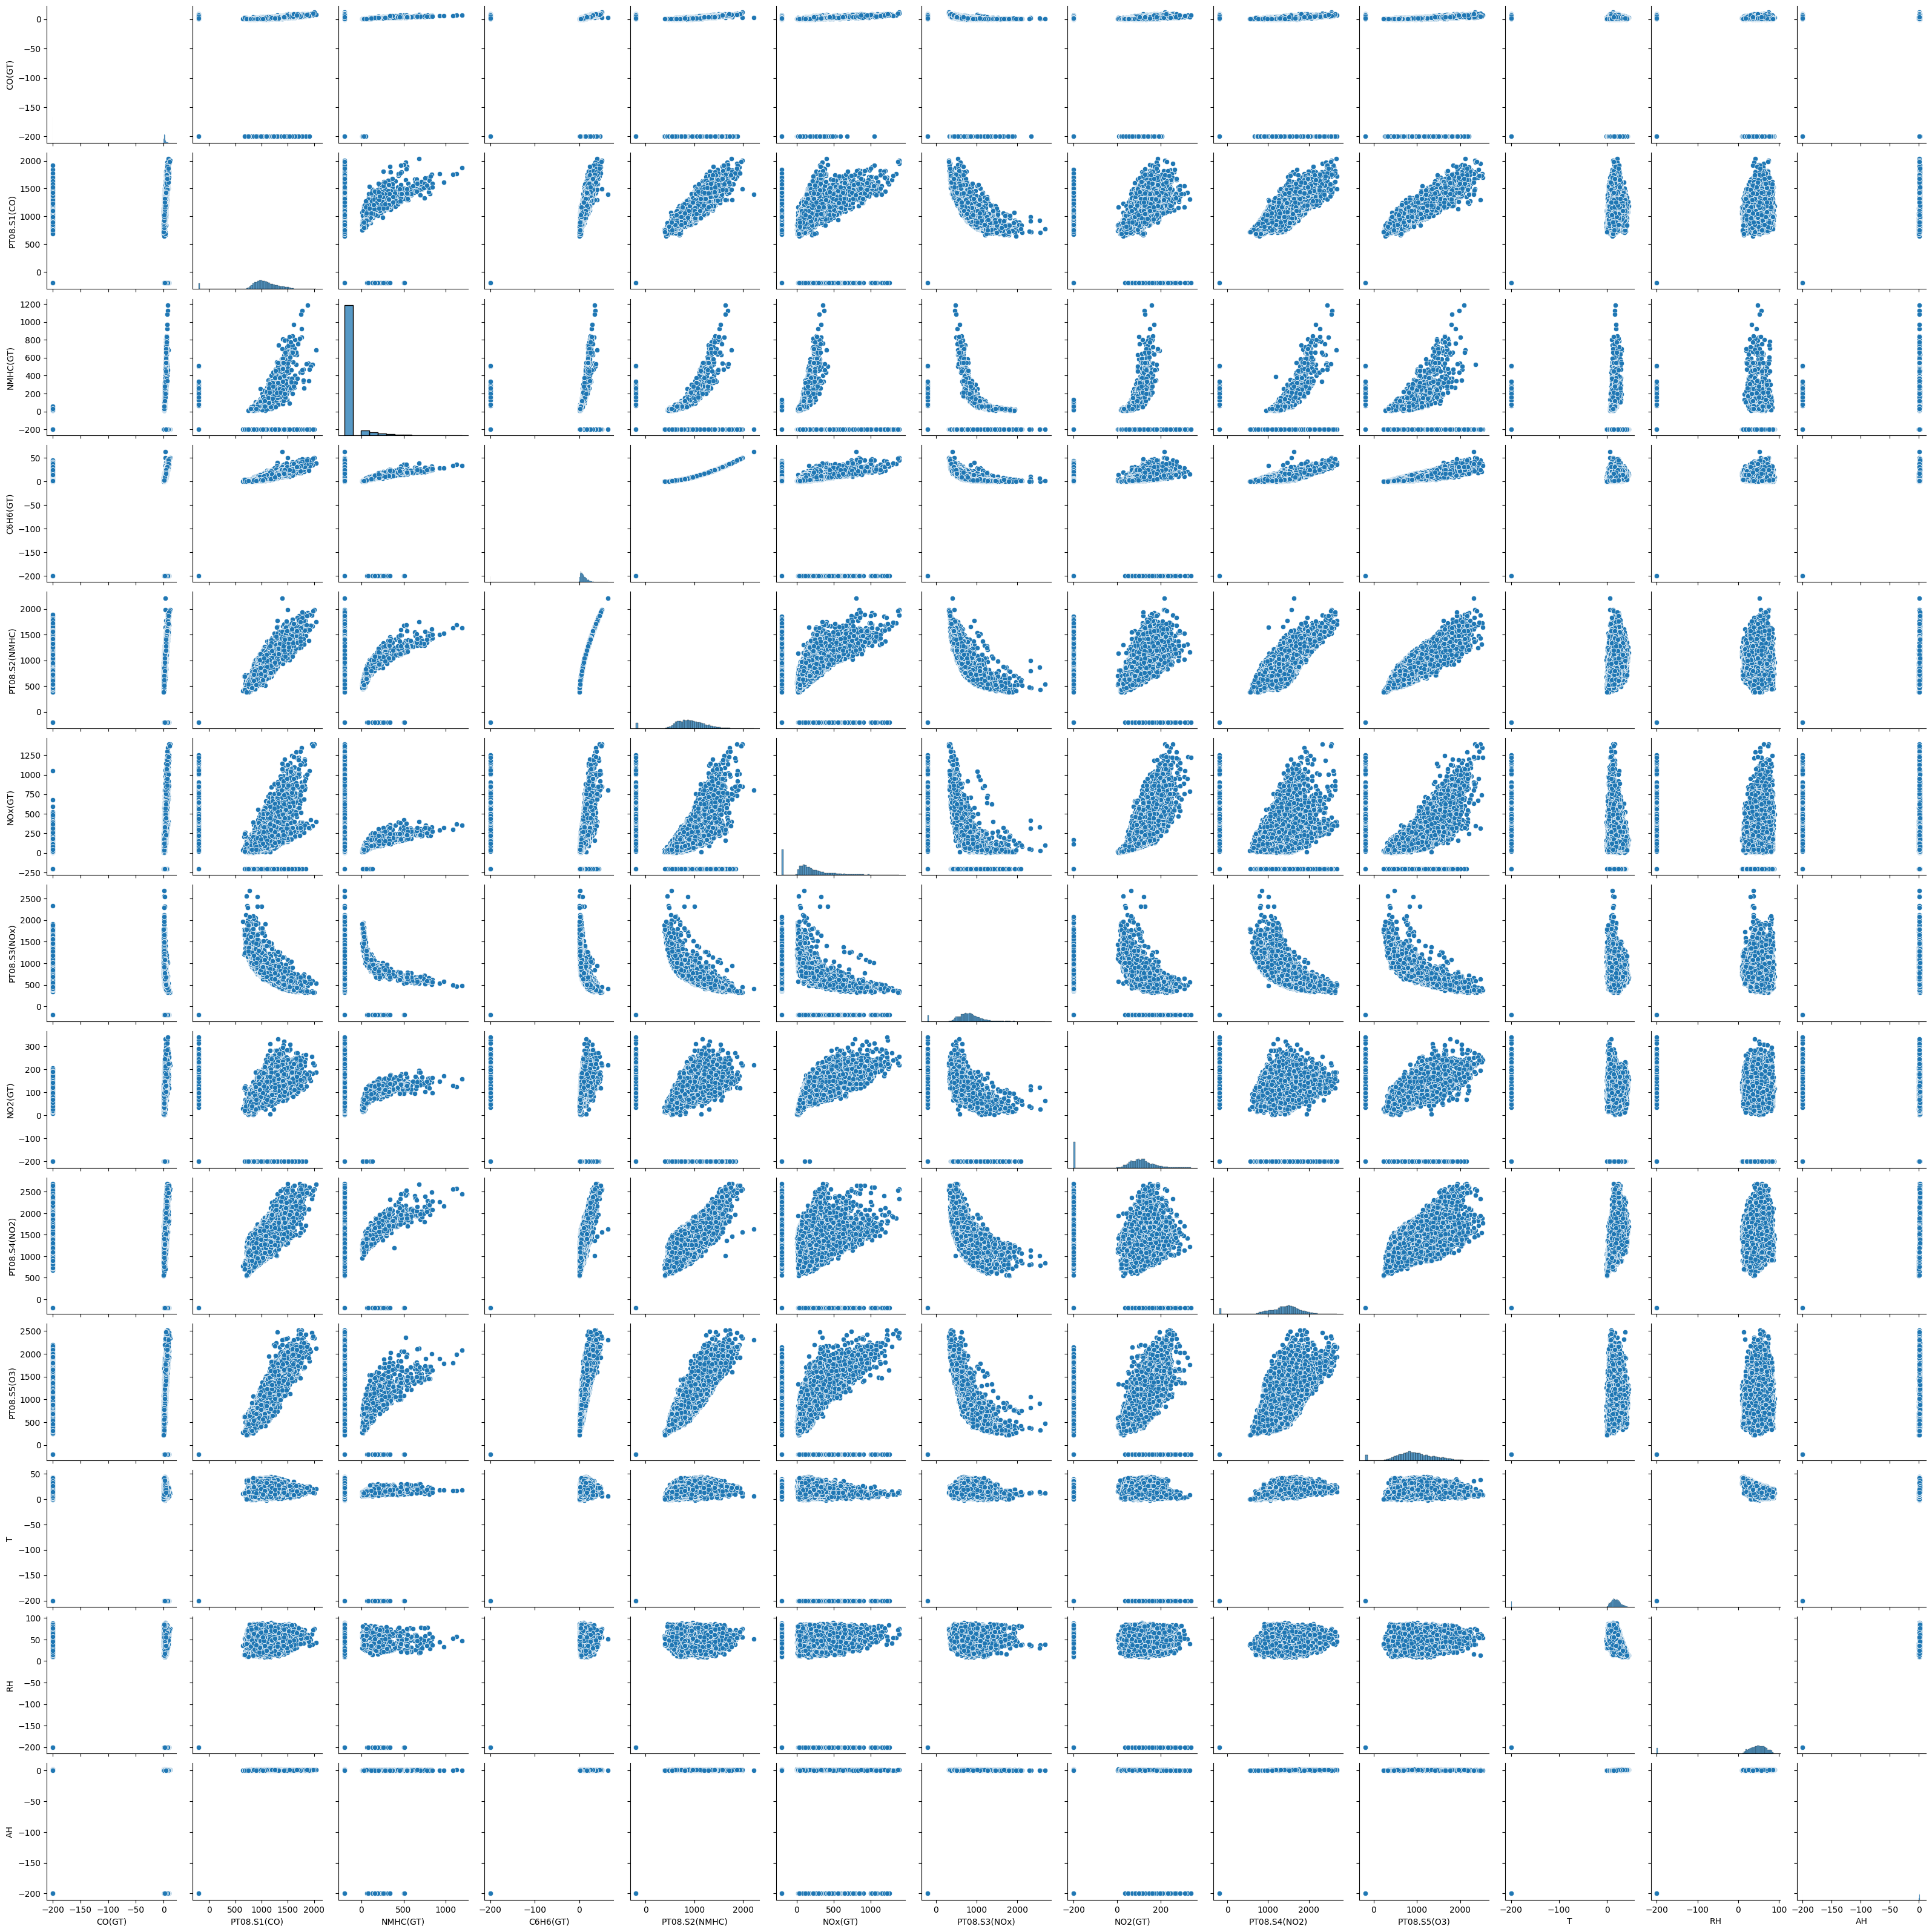

In [30]:
sns.pairplot(train)

In [31]:
reg = LinearRegression().fit(X, Y)

In [32]:
print(f'{reg.intercept_[0]} + {reg.coef_[0][0]}*X1 + {reg.coef_[0][1]}*X2')

120.43204114956164 + 0.3519330537820784*X1 + 0.003928327874146265*X2


In [35]:
x1i = float(input('enter x1:'))
x2i = float(input('enter x2:'))
x3i = float(input('enter x3:'))
x4i = float(input('enter x4:'))
x5i = float(input('enter x5:'))
x6i = float(input('enter x6:'))
x7i = float(input('enter x7:'))
x8i = float(input('enter x8:'))
x9i = float(input('enter x9:'))
x10i = float(input('enter x10:'))
x11i = float(input('enter x11:'))
x12i = float(input('enter x12:'))
x = np.array([[x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x9i, x10i, x11i, x12i]])
y_pred = reg.predict(x)
print(f'predicted value:{y_pred}')

predicted value:[[2020.56358841]]


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
test_x = test.drop('NO2(GT)', axis=1)
test_x = pd.DataFrame(test_x)
predictions = reg.predict((test_x))
mse = mean_squared_error(test['NO2(GT)'], predictions)
print(f'mse = {mse}')

mse = 2818.4517809217
